# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования** - научиться определять рыночную стоимость объектов недвижимости. 


**Задача** — установить параметры, которые позволят построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.


**Ход исследования**

Данные поличим из файла /datasets/real_estate_data.csv. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.  


Таким образом, исследование пройдёт в четыре этапа:
 1. Изучение данных из файла.
 2. Предобработка данных.
 3. Расчёты и добавление результатов в таблицу.
 4. Исследовательский анализ данных.
 5. Вывод.

## Изучение данных из файла

In [1]:
import warnings #импортируем управление предупреждениями
warnings.filterwarnings('ignore') #просим игнорировать предупреждения
import matplotlib.pyplot as plt # импортируем библиотеку matplotlib 
import pandas as pd #импорт библиотеки pandas
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #чтение файла с данными и сохранение в data 

Для начала ознакомимся с нашими данными.

In [2]:
data.head(10) #получение первых 10 строк таблицы data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info() #получение общей информации о данных в таблице data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Итак, в таблице 22 столбца. Тип данных в большинстве столбцах — float64, но также присутствует тип bool, int64 и object.

Согласно документации к данным:

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении
В названиях колонок видим нарушение стиля - строчные буквы сочетаются с прописными.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

Также сразу видно, что в столбце `is_apartment` должен быть булев тип по документации, а по общей информации из таблицы видим, что значение в этом столбце object. 

Выводы

Предварительно можно утверждать, что данных достаточно для анализа, но встречаются пропуски в данных, с чем предстоит разобраться.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

###  Пропуски значений

Изучим пропущенные значение в таблице методом isna()

In [4]:
data.isna().sum() #количество пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
round(data.isna().sum()*100/len(data), 2) #доля пропусков

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height          38.80
floors_total             0.36
living_area              8.03
floor                    0.00
is_apartment            88.29
studio                   0.00
open_plan                0.00
kitchen_area             9.61
balcony                 48.61
locality_name            0.21
airports_nearest        23.38
cityCenters_nearest     23.29
parks_around3000        23.28
parks_nearest           65.91
ponds_around3000        23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64

Во многих столбцах наблюдаем пропущенные значения.

Можем предположить, что пропуски в стобце `balcony` непосредственно связаны отсутствием самих балконов. В данном случае заменим пропуски на ноль. 

Аналогичная мысль появляется при анализе пропусков в столбцах `ponds_around3000` и `parks_around3000`, скорее всего NaN указаны для тех объектов, которые находятся дальше от парков и водоёмов более чем на 3 км. В этих столбцах тоже заменим пропуски на ноль. В `floors_total`  всего 0,36% пропусков. Можем заменить на 0, на ход исследования это не повлияет. 

Проанализируем столбец `days_exposition`, вполне вероятно, что квартира все еще на продаже. 

In [6]:
display(data.query('days_exposition.isna()')) #смотрим на срез данных
  

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,NaN,...,7.00,NaN,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,NaN,...,8.30,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,...,15.60,NaN,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,...,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Видим, что большинство объявлений от 2019 и 2018 года, скорее всего на момент выгрузки данных объявления все еще были актуальны. Предположить, что квартиры уже проданы не можем, так как в таком случае система бы поставила дату закрытия объявления.

В данном случае логично убрать из анализа квартиры, которые все еще на продаже, так как они могут иметь завышенную цену или другие аномальные значения.

In [7]:
data.dropna(subset=['days_exposition'], inplace=True) #удаляем строки с пропусками в столбце days_exposition
data['days_exposition'].isna().sum() #проверяем результат

0

Заменим пропущенные значения в столбцах `balcony`, `ponds_around3000`, `floors_total` и `parks_around3000` на 0 с помощью цикла for.
Для этого создадим переменную `columns_to_replace`

In [8]:
columns_to_replace = ['balcony', 'ponds_around3000', 'parks_around3000', 'floors_total']  #перебор названий столбцов в цикле и замена пропущенных значений на 0
for i in columns_to_replace:
    data[i] = data[i].fillna(0)
data.isna().sum() #проверяем результат работы цикла

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8467
floors_total                0
living_area              1705
floor                       0
is_apartment            18018
studio                      0
open_plan                   0
kitchen_area             2075
balcony                     0
locality_name              48
airports_nearest         4675
cityCenters_nearest      4653
parks_around3000            0
parks_nearest           13584
ponds_around3000            0
ponds_nearest           12624
days_exposition             0
dtype: int64

Теперь заменим пропуски в столбце `is_apartment` на значение False. Можно предположить, что апартаментов в нашем исследовании не так много и пропуски означают, что исследуемая недвижимость не апартаменты.

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False) #заполняем пропуски булевым значением False
data.isna().sum() #проверяем, заменились ли пропуски 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8467
floors_total                0
living_area              1705
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2075
balcony                     0
locality_name              48
airports_nearest         4675
cityCenters_nearest      4653
parks_around3000            0
parks_nearest           13584
ponds_around3000            0
ponds_nearest           12624
days_exposition             0
dtype: int64

Попробуем заполнить пропуски в столбце `living_area`. Найдем соотношение средней общей площади к средней жилой, а затем заполним отношением общей площади к найденному соотношению. То же самое проделаем с пропусками в столбце `kitchen_area`. 

In [10]:
new_living_area = data[data['living_area'].isnull() == False]['total_area'].mean() / \
data[data['living_area'].isnull()== False]['living_area'].mean() #считаем соотношение средней общей площади к средней жилой

new_kitchen_area = data[data['kitchen_area'].isnull() == False]['total_area'].mean() / \
data[data['kitchen_area'].isnull()== False]['kitchen_area'].mean() #считаем соотношение средней общей площади к средней площади кухни

data['living_area'] = data['living_area'].fillna(data['total_area']/new_living_area) #заполняем отношением средней общей площади к средней жилой
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']/new_kitchen_area) #заполняем отношением средней общей площади к средней площади кухни
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8467
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              48
airports_nearest         4675
cityCenters_nearest      4653
parks_around3000            0
parks_nearest           13584
ponds_around3000            0
ponds_nearest           12624
days_exposition             0
dtype: int64

In [11]:
pd.set_option('display.max_columns', None) # выводим все стролбцы в табличке
data.head(10) #смотрим на 10 первых строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.600000,1,False,False,False,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.300000,4,False,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,90.856428,9,False,False,False,27.975245,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.400000,5,False,False,False,9.100000,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.600000,6,False,False,False,14.400000,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.430000,26,False,False,False,8.810000,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.600000,7,False,False,False,6.500000,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.300000,3,False,False,False,8.500000,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
11,9,3300000.0,44.00,2018-08-27T00:00:00,2,NaN,5.0,31.000000,4,False,False,False,6.000000,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0


Создадим условие, при котором все квартиры, у которых жилая и площаль кухни в сумме больше общей площади, заполняются нулем. 

In [12]:
data.loc[(data['living_area'] + data['kitchen_area']) > data['total_area'], 'kitchen_area'] = data['kitchen_area'].fillna(0)


В дальнейшем анализе мы не будем работать со значениями из столбца `living_area` и `kitchen_area`.

У нас остались пропуски в столбцах: `ceiling_height`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest`. Причем в некоторых очень большое количество - более 60% от общего числа данных, но так как для этих столбцов нет подходящего значения на замену - оставим значения пустыми. Замена медианой, средним значением или нулями может привести к  искажению результатов исследования.

Комментарии по проделанной работе с пропущенными значениями укажем ниже к каждому столбцу:
* `balcony` (число балконов) - _заменили пропуски на 0_
* `is_apartment (апартаменты)` - _заменили пропуски на False_
* `ceiling_height`(высота потолков (м)) - _для данного столбца нет подходящего значения на замену_
* `floors_total` (всего этажей в доме) - _заменили пропуски на 0_
* `living_area` (жилая площадь в квадратных метрах (м²)) - _заполнили отношением средней общей площади к средней жилой_
* `kitchen_area` (площадь кухни в квадратных метрах (м²)) - _заполнили отношением средней общей площади к средней площади кухни_
* `locality_name` (название населённого пункта) - _для данного столбца нет подходящего значения на замену_
* `airports_nearest` (расстояние до ближайшего аэропорта в метрах (м))- _для данного столбца нет подходящего значения на замену_
* `cityCenters_nearest` (расстояние до центра города (м)) - _для данного столбца нет подходящего значения на замену_
* `parks_around3000` (число парков в радиусе 3 км) - _заменили пропуски на 0_
* `ponds_around3000` (число водоёмов в радиусе 3 км) - _заменили пропуски на 0_
* `ponds_nearest` (расстояние до ближайшего водоёма) - _для данного столбца нет подходящего значения на замену_
* `days_exposition` (сколько дней было размещено объявление (от публикации до снятия)) - _удалили из анализа_

В целом, видим много пропущенных значений в датасете, что является поводом обратиться к разработчику и выяснить причины. 

Предварительно можем предположить, что на этапе выгрузки дынных произошел сбой. Однако есть вероятность, что в некоторые столбцы данные не внесены специально.

### Изменение типов данных.

Заменим вещественный тип данных в столбце `is_apartment` на bool с помощью метода astype().
А также поменяем данные в столбцах `days_exposition`, `floors_total`, `parks_around3000`, `ponds_around3000` и `balcony` на тип int64.


In [13]:
data['is_apartment'] = data['is_apartment'].astype('bool')

Поменяем тип данных в стобцах  `days_exposition`, `floors_total`, `parks_around3000`, `ponds_around3000` и `balcony` с float на int64 с помощью цикла for.

In [14]:
type_replace = ['days_exposition', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000'] #перебор названий столбцов в цикле и замена типа данных на int
for j in type_replace:
    data[j] = data[j].astype('int')

Поменяем тип данных в столбце `first_day_exposition` на datetime.

In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d') #переводим столбец с датой в формат даты без времени, так как время не указано
data.info() #проверяем информацию по таблице с измененным типом данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20518 entries, 1 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20518 non-null  int64         
 1   last_price            20518 non-null  float64       
 2   total_area            20518 non-null  float64       
 3   first_day_exposition  20518 non-null  datetime64[ns]
 4   rooms                 20518 non-null  int64         
 5   ceiling_height        12051 non-null  float64       
 6   floors_total          20518 non-null  int64         
 7   living_area           20518 non-null  float64       
 8   floor                 20518 non-null  int64         
 9   is_apartment          20518 non-null  bool          
 10  studio                20518 non-null  bool          
 11  open_plan             20518 non-null  bool          
 12  kitchen_area          20518 non-null  float64       
 13  balcony         

### Вывод

Закончили этап предобработки данных.
Заменили пропущенные значения на ноль, где это было уместно. Также заменили тип данных в столбцах `days_exposition`, `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000` на int для удобства дальнейшего исследования.
В столбце `first_day_exposition` исправили тип данных на datetime, а  в `is_apartment`на bool.

## Расчёты и добавление результатов в таблицу

Добавим в таблицу новые данные:
* цену квадратного метра
* день недели, месяц и год публикации объявления
* этаж квартиры; варианты — первый, последний, другой
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [16]:
data['price_one_square_meter'] = (data['last_price'] /data['total_area']).round(2) #дабаляем столбец с ценой квадратного метра
data['weekday'] = data['first_day_exposition'].dt.weekday #добавляем столбец со днем недели
data['month'] = data['first_day_exposition'].dt.month #добавляем столбец с месяцем
data['year'] = data['first_day_exposition'].dt.year #добавляем столбец с годом

In [17]:
def to_floor(value): #функция для распределения этажей квартиры
    floors_total = value['floors_total']
    floor = value['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [18]:
data['floor_category'] = data.apply(to_floor, axis = 1) #добавляем новый столбец с результатами работы функции

In [19]:
data['living_area_ratio'] = data['living_area'] / data['total_area'] #добавляем столбец соотношения жилой площади к общей
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area'] #добавляем столбец отношения площади кухни к общей
data.head() #проверяем наличие новых столбцов

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,90.856428,9,False,False,False,27.975245,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015,другой,0.571424,0.175945
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018,другой,0.320000,0.410000
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.400000,5,False,False,False,9.100000,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55,95065.79,0,9,2018,другой,0.473684,0.299342


### Вывод

Добавили нужные нам для анализа данные в таблицу.

## Исследовательский анализ данных

### Изучим следующие параметры: площадь, цена, число комнат, высота потолков.

count    20518.000000
mean        58.870830
std         34.077046
min         12.000000
25%         39.500000
50%         50.900000
75%         67.900000
max        900.000000
Name: total_area, dtype: float64

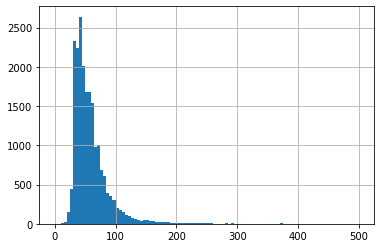

In [20]:
data['total_area'].hist(range=(0, 500), bins=100) #построим гистограмму для площади
data['total_area'].describe() #получим общее описание по столбцу total_area

В целом данные однородные, наблюдаем пик на 40-ка м². Есть небольшие выбросы, которые не будут влиять на исход исследования за счет небольшого количества. Среднее и медиана не сильно отличаются друг от друга. Еще обратим внимание на максимальное значение 900 м², но не будем его исправлять, так как вполне вероятно, что значение правдивое. 

count    2.051800e+04
mean     6.266173e+06
std      1.086298e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.500000e+06
75%      6.500000e+06
max      7.630000e+08
Name: last_price, dtype: float64

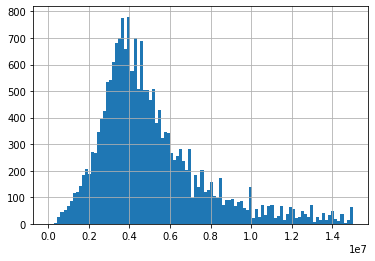

In [21]:
data['last_price'].hist(range=(0, 15000000), bins=100) #построим гистограмму для цены
data['last_price'].describe() #получим общее описание по столбцу last_price

На гистограмме цены наблюдаем нормальное распределение данных. Видим пик на 4 млн, что похоже на правду. Но в то же время минимальная стоимость объекта по общему описанию - 12 190 рублей, что вряд ли корректно.

count    20518.000000
mean         2.024564
std          1.054808
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

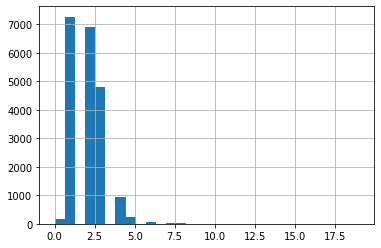

In [22]:
data['rooms'].hist(bins=30) #построим гистограмму для числа комнат
data['rooms'].describe() #получим общее описание по столбцу rooms

Видим, что больше всего объектов с одной и двумя комнатами. Также обратим внимание на аномалии - количество комнат 0, причина появления которых непонятна. 

count    12051.000000
mean         2.761805
std          1.263803
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

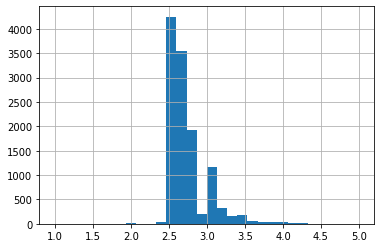

In [23]:
data['ceiling_height'].hist(range=(1, 5), bins=30) #построим гистограмму для высоты потолков
data['ceiling_height'].describe() #получим общее описание по столбцу ceiling_height

В среднем высота потолков в выборке составляет 2,7 метра - вполне реальное значение. Но также присутствуют аномальные значения, так как 1 и 100 метров.

**Вывод**

Практически во всех проверенных столбцах видим аномальные значения, которые описали выше. О причине их возникновения лучше уточнить у заказчика. Для дальнейшего исследования не будем удалять аномальные значения.

### Изучим время продажи квартиры.

Построим гистограмму и посчитаем среднее значение и медиану. 

Так как на предыдущих шагах мы заменили пропущенные значения в столбце `days_exposition` на 0, не будем учитывать их при построениии гистограммы.

Для начала построим диаграмму размаха, чтобы визуально оценить характеристики распределения.

(1.0, 1000.0)

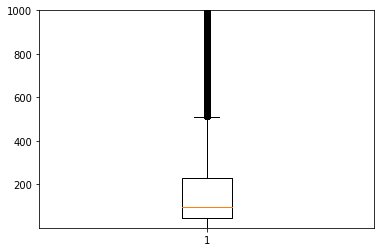

In [24]:
plt.boxplot(data['days_exposition']) #строим диаграмму размаха
plt.ylim(1,1000)

Большая часть значений лежит в диапазоне до 200 дней, а ориентировочная граница нормального размаха примерно 500 дней.

Построим гистрограммы для наглядности.

<AxesSubplot:ylabel='Frequency'>

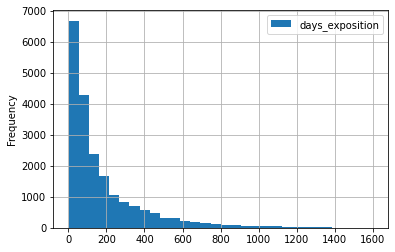

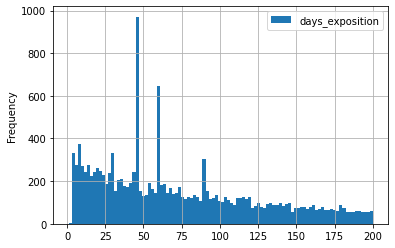

In [25]:
data.plot(y = 'days_exposition', kind = 'hist', range = (1,1600), bins = 30, grid = True) #строим гистограмму времени продажи квартиры
data.plot(y = 'days_exposition', kind = 'hist', range = (1,200), bins = 100, grid = True) #строим гистограмму времени продажи квартиры для нормальных значений 

In [26]:

data[data['days_exposition']!=0]['days_exposition'].describe() #получим общее описание по столбцу days_exposition, без учета нулевых значений

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

На гистограмме нормальных значений видим несколько подозрительных пиков, самые явные примерно на 45, 60 и 90, также есть выбивающиеся значения на 7-ми и 30-ти днях.

Проверим количество уникальных значений методом value_counts.

In [27]:
data[data['days_exposition']!=0]['days_exposition'].value_counts() #проверяем количество уникальных значений

45      880
60      538
7       234
30      208
90      204
       ... 
1112      1
1080      1
1064      1
1032      1
1391      1
Name: days_exposition, Length: 1141, dtype: int64

Действительно, видим много публикаций, которые были проданы за 7, 30, 45, 60 и 90 дней, что вызывает подозрения. Можем предположить, что дата снятия публикации - это не есть дата продажи. Скорее всего публикации снимаются автоматически по истечению заранее обозначенного на платформе времени. Подтверждение данной гипотезе есть на официальном сайте Яндекс Справка.

**Вывод** 

Исходя из общего описания, межквартальный размах для времени продажи квартиры является промежуток начиная от 45 и до 232 дней, а по диаграмме размаха нормальные значения простираются примерно до 500 дней, остальные значения считаются выбросами. 

Можем сказать, что обычно продажа занимает от 1 до 500 дней, если продажа прошла до 45 дней, то это считается быстро, а после 550 дней - необычно долго. 

### Убираем редкие и выбивающиеся значения.

Примем решение убрать из анализа выбивающиеся значения в столбце `days_exposition`, так как мы выяснили, что это особенность размещения публикации на Яндекс Недвижимость.

Для этого сделаем срез, который исключает значения в 7, 30, 45, 60 и 90 дней.

In [28]:
data2 = data.query('total_area <= 200 \
    and last_price <= 20000000 \
    and 0 < rooms <= 5 \
    and 2.2 <= ceiling_height <= 4 \
    and days_exposition != 0 \
    and days_exposition != 7 \
    and days_exposition != 30 \
    and days_exposition != 45 \
    and days_exposition != 60 \
    and days_exposition != 90'\
                 ) #делаем срез без аномалий


Теперь посмотрим на диаграмму размаха и общее описание для отфильтрованных значений столбца `days_exposition`.

count    10490.000000
mean       200.744423
std        231.153982
min          1.000000
25%         47.000000
50%        117.000000
75%        265.000000
max       1580.000000
Name: days_exposition, dtype: float64

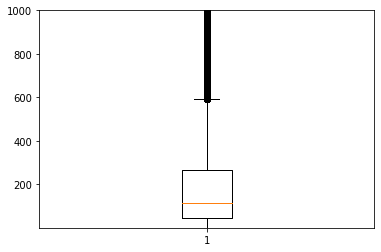

In [29]:
plt.boxplot(data2['days_exposition']) #строим диаграмму размаха
plt.ylim(1,1000)
data2['days_exposition'].describe()

<AxesSubplot:ylabel='Frequency'>

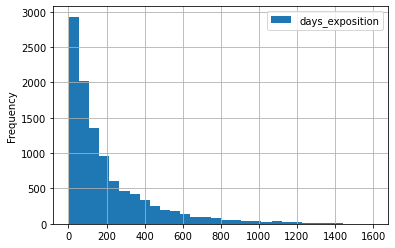

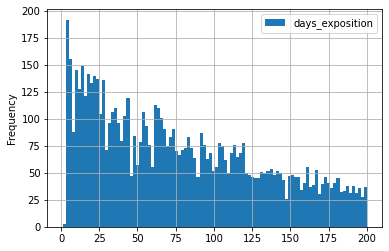

In [30]:
data2.plot(y = 'days_exposition', kind = 'hist', range = (1,1600), bins = 30, grid = True) #строим гистограмму времени продажи квартиры
data2.plot(y = 'days_exposition', kind = 'hist', range = (1,200), bins = 100, grid = True) #строим гистограмму времени продажи квартиры для нормальных значений 

In [31]:
data2['days_exposition'].value_counts() #проверяем количество уникальных значений

4       102
3        90
8        88
14       86
5        83
       ... 
636       1
684       1
700       1
688       1
1375      1
Name: days_exposition, Length: 1009, dtype: int64

**Вывод**

В этом разделе очистили нашу таблицу от выбивающихся значений. Ограничили цену до 20 млн, высоту потолков от 2.2 до 4х метров, общую площадь до 200, и удалили выбивающиеся значения в столбце days_exposition, так как мы выяснили, что это особенность размещения публикации на Яндекс Недвижимость - исключили значения в 7, 30, 45, 60 и 90 дней.

В отфильтрованных данных по столбцу `days_exposition` видим изменение среднего (195) и медианы (114), в то время как в изначальных данных данных значение среднего было 180, а медианы - 95. Также видим, что теперь нормальные значения доходят до 600 дней, а ранее было 500.

### Какие факторы больше всего влияют на стоимость квартиры? 

**Проанализируем зависит ли цена квартиры от площади.**

<AxesSubplot:xlabel='total_area'>

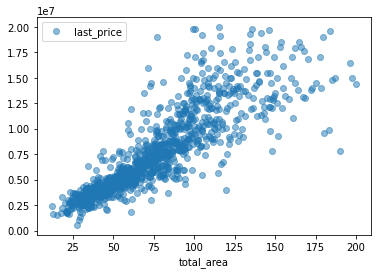

In [32]:
data2.pivot_table(index='total_area', values='last_price', aggfunc='median').plot(style='o', alpha=0.5) #строим график по сводной таблице

In [33]:
data2['total_area'].corr(data['last_price']) #считаем коэффициент корреляции Пирсона

0.773311674777403

Видим зависимость стоимости квартиры от ее площади, но также обратим внимание на маленький процент корреляции. 

Видим, что эти два праметра почти не взаимосвязаны друг с другом. Но нужно смотреть грубже, так как маловероятно, что это правда. 

**Проанализируем зависит ли цена квартиры от количества комнат.**

<AxesSubplot:xlabel='rooms'>

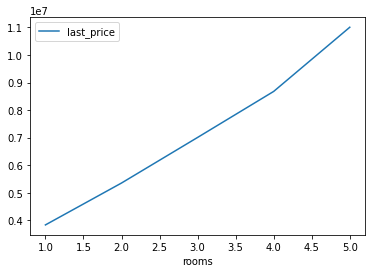

In [34]:
data2.pivot_table(index = 'rooms', values = 'last_price').plot() #строим график по сводной таблице

In [35]:
data2['rooms'].corr(data['last_price']) #считаем коэффициент корреляции Пирсона

0.49852610296725675

Видим плавное подорожание стоимости начиная от одной и до пяти комнат, взаимосвязь очевидна. Только вот процент корреляции маленький. 


**Проанализируем зависит ли цена квартиры от удаленности от центра.**

<AxesSubplot:xlabel='cityCenters_nearest'>

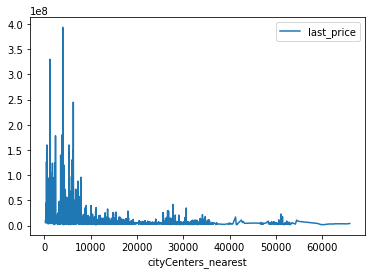

In [36]:
data.pivot_table(index='cityCenters_nearest', values='last_price').plot() #строим график по сводной таблице

In [37]:
data['cityCenters_nearest'].corr(data['last_price']) #считаем коэффициент корреляции Пирсона

-0.19343667576402354

Тут видим явную зависимость, что подтверждает и отрицательная корреляция. Чем ближе квартира к центру, тем она дороже.

**Проанализируем зависит ли цена квартиры от этажа: первый, последний или другой.**

<AxesSubplot:xlabel='floor_category'>

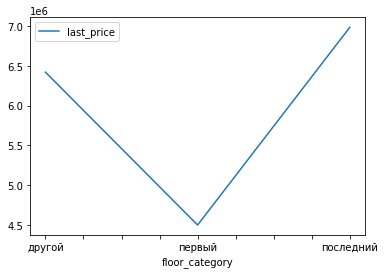

In [38]:
data.pivot_table(index='floor_category', values='last_price').plot() #строим график по сводной таблице

По графику можем сказать, что квартиры на первом этаже в среднем дешевле, чем на любом другом. В то время как, квартиры на последнем этаже дороже остальных квартир. 

**Проанализируем зависит ли цена квартиры от даты размещения: дня недели, месяца и года.**

<AxesSubplot:xlabel='weekday'>

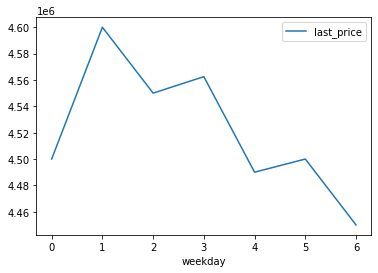

In [39]:
data.pivot_table(index=['weekday'], values='last_price', aggfunc='median').plot() #строим график по сводной таблице

In [40]:
data['weekday'].corr(data['last_price']) #считаем коэффициент корреляции Пирсона

0.00463690877420102

Видим, что начиная от понедельника стоимость на квартиры стремительно падает вплоть до пятницы. В субботу самая низная стоимость. 

<AxesSubplot:xlabel='month'>

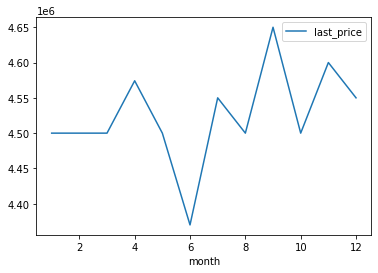

In [41]:
data.pivot_table(index=['month'], values='last_price', aggfunc='median').plot() #строим график по сводной таблице

In [42]:
data['month'].corr(data['last_price']) #считаем коэффициент корреляции Пирсона

0.005631446656550295

Есть зависимость от месяца размещения, летом квартиры стоят в среднем дешевле. Видим, что в июне дешевле всего, а дальше идет увеличение цены перед новым годом. 

<AxesSubplot:xlabel='year'>

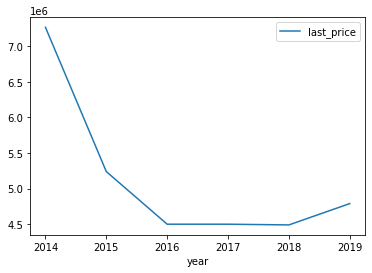

In [43]:
data.pivot_table(index=['year'], values='last_price', aggfunc='median').plot() #строим график по сводной таблице

In [44]:
data['year'].corr(data['last_price']) #считаем коэффициент корреляции Пирсона

-0.06112153555000583

Видно, что начиная с 2014 стоимость падала и до 2016 года, далее наблюдаем практически одинаковую стоимость на протяжение трех лет, а далее увеличение. 

**Вывод**

После анализа указаных параметров выявили четкую взаимосвязь стоимости квартиры от ее расположения, а точнее расстояния до центра города - чем ближе квартира к центру, тем она дороже. Также заметили, что стоимость квартиры зависит от числа комнат - чем больше комнат, тем дороже. На каком этаже расположена квартира: на первом этаже квартиры дешевле, а на последнем дороже. И от даты размещения: по пятницам и субботам стоимость квартиры при размещении дешевле, чем в остальные дни. Летом  квартиры стоят в среднем дешевле, а также увидели, что начиная с 2014 стоимость падала и до 2016 года, далее наблюдаем практически одинаковую стоимость на протяжение трех лет, а далее увеличение. 

### Анализ 10-ти населённых пунктов с наибольшим числом объявлений

In [45]:
data['locality_name'].value_counts().head(10) #посмотрим на 10 населённых пунктов с наибольшим числом объявлений

Санкт-Петербург      13638
посёлок Мурино         517
посёлок Шушары         408
Всеволожск             339
Колпино                308
Пушкин                 307
посёлок Парголово      302
деревня Кудрово        299
Гатчина                268
Выборг                 208
Name: locality_name, dtype: int64

Построим сводную таблицу для подсчета средней цены квадратного метра в десяти населенных пунктах с наибольшим числом объявлений.

In [46]:
locality_name_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_one_square_meter', aggfunc=['count', 'mean'])
locality_name_pivot_table.columns = ['count', 'mean']
locality_name_pivot_table = locality_name_pivot_table.sort_values('count', ascending = False).head(10)
display(locality_name_pivot_table) 

,count,mean
locality_name,,
Санкт-Петербург,13638,112412.025191
посёлок Мурино,517,85818.383520
посёлок Шушары,408,78010.167525
Всеволожск,339,68570.615310
Колпино,308,74865.364351
Пушкин,307,102074.629283
посёлок Парголово,302,89505.043543
деревня Кудрово,299,92473.547559
Гатчина,268,67928.326791


In [47]:
locality_name_pivot_table[locality_name_pivot_table['mean']==locality_name_pivot_table['mean'].max()] #найдем город с самой высокой стоимостью жилья 

,count,mean
locality_name,,
Санкт-Петербург,13638,112412.025191


In [48]:
locality_name_pivot_table[locality_name_pivot_table['mean']==locality_name_pivot_table['mean'].min()]  #найдем город с самой низкой стоимостью жилья 

,count,mean
locality_name,,
Выборг,208,57084.583221


**Вывод**

Мы нашли 10 посёлков с наибольши количеством объявлений. На первом месте Санкт-Петербург, а на последнем Выборг.
По наибольшей стоимости жилья лидирует Санкт-Петербург, как и ожидалось. В Выборге, судя по нашим данным, самая низкая стоимость жилья.

### Изучим предложения квартир

Выделим квартиры в Санкт-Петербурге , наша задача — выяснить, какая область входит в центр. 

<AxesSubplot:xlabel='cityCenters_nearest_km'>

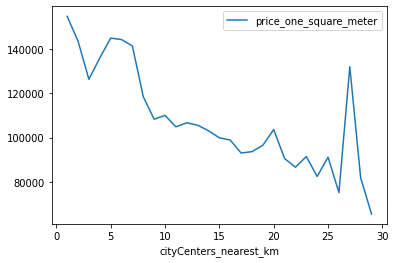

In [49]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000 #дабляем столбец с километрами
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(0) #заполняем пропуски нулем
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int') #округляем значения до целого
(data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=0')
 .pivot_table(index = 'cityCenters_nearest_km', values = 'price_one_square_meter')
).plot() #строим график для квартир в Санкт-Петербурге, без учета нулей


**Вывод**

По графику видим, что цена резко меняется примерно на 3-х километрах, это и будем считать центральной зоной. 

### Выделим сегмент квартир в центре

На предыдущем шаге выяснили, что можем считать центральной зоной 6 километров. 
Для анализа сделаем новую таблицу с помощью среза.

In [50]:
spb_center = data.query('cityCenters_nearest_km <= 3 and locality_name == "Санкт-Петербург"') #выделим квартиры в центре, беря за радиус 3 км

**Проанализируем зависимость стоимости квартиры от площади в центральной зоне Санкт-Петербурга.**

<AxesSubplot:xlabel='total_area'>

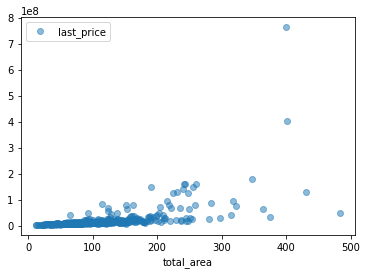

In [51]:
spb_center.pivot_table(index='total_area', values='last_price').plot(style='o', alpha=0.5) #делаем сводную таблицу и график

In [52]:
spb_center['total_area'].corr(spb_center['last_price']) #посчитаем корреляцию

0.5553676223973506

По графику видим, что в пределах центра СПБ площадь квартиры влияет на ее стоимость, также, как и по общей выборке данных. Обратим внимание, что корреляция для центральной зоны стала немного меньше.

**Проанализируем зависимость стоимости квартиры от числа комнат в центральной зоне Санкт-Петербурга.**

<AxesSubplot:xlabel='rooms'>

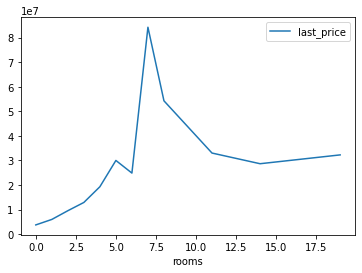

In [53]:
spb_center.pivot_table(index='rooms', values='last_price').plot() #делаем сводную таблицу и график

In [54]:
spb_center['rooms'].corr(spb_center['last_price']) #посчитаем корреляцию

0.2648207962070345

Для центральной зоны видим характерное подорожание квартиры от количества комнат начиная с одной, в то время как в общей выборке данных наблюдали примерно одинаковую стоимость для квартир от одной до 10 комнат. Но в то же время процент корреляции низкий, поэтому связь тут неоднозначна. 

**Проанализируем зависимость стоимости квартиры от высоты потолков в центральной зоне Санкт-Петербурга.**

<AxesSubplot:xlabel='ceiling_height'>

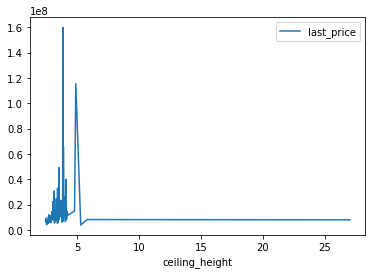

In [55]:
spb_center.pivot_table(index='ceiling_height', values='last_price').plot() #делаем сводную таблицу и график

In [56]:
spb_center['ceiling_height'].corr(spb_center['last_price']) #посчитаем корреляцию

0.06126135685480788

По графику не видим четкую зависимость стоимости квартиры от высоты потолков, корреляция это подтверждает, процент мизерный. Также обратим внимание на резкий спад стоимости начиная с пяти метров. 

**Проанализируем зависимость стоимости квартиры от этажа в центральной зоне Санкт-Петербурга.**

<AxesSubplot:xlabel='floor_category'>

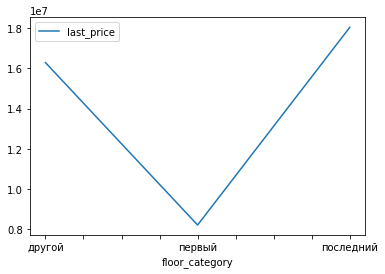

In [57]:
spb_center.pivot_table(index='floor_category', values='last_price').plot() #делаем сводную таблицу и график

В сравнении с общей выборкой, для цетральной зоны ситуация со стоимостью квартиры не изменилась. Квартиры на первом этаже в среднем дешевле, чем на любом другом. В то время как, квартиры на последнем этаже дороже остальных квартир.

**Проанализируем зависимость стоимости квартиры от удаленности от центра в центральной зоне Санкт-Петербурга.**

<AxesSubplot:xlabel='cityCenters_nearest_km'>

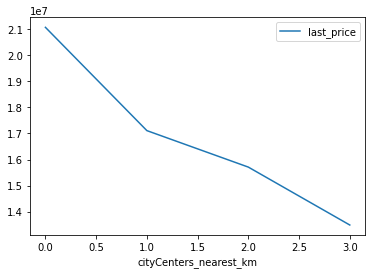

In [58]:
spb_center.pivot_table(index='cityCenters_nearest_km', values='last_price').plot() #делаем сводную таблицу и график

In [59]:
spb_center['cityCenters_nearest_km'].corr(spb_center['last_price']) #посчитаем корреляцию

-0.06585098071086656

Судя по графику четкая зависимость не прослеживается, так как мы и так анализируем информацию по центру города. 

**Проанализируем зависимость стоимости квартиры от дня размещения объявления в центральной зоне Санкт-Петербурга.**

<AxesSubplot:xlabel='weekday'>

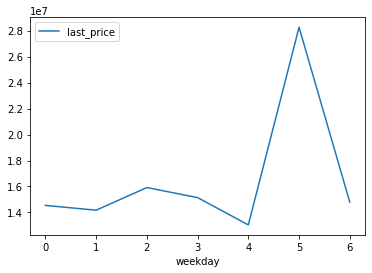

In [60]:
spb_center.pivot_table(index='weekday', values='last_price').plot() #делаем сводную таблицу и график

In [61]:
spb_center['weekday'].corr(spb_center['last_price']) #посчитаем корреляцию

0.03338420199968604

По графику видим, что в четверг и субботу стоимость на квартиры ниже всего, а пятницу самая высокая. А то время как в общей выборке, по пятницам как раз было дешевле всего. 

**Проанализируем зависимость стоимости квартиры от месяца размещения объявления в центральной зоне Санкт-Петербурга.**

<AxesSubplot:xlabel='month'>

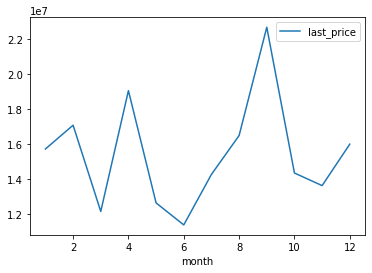

In [62]:
spb_center.pivot_table(index='month', values='last_price').plot() #делаем сводную таблицу и график

In [63]:
spb_center['month'].corr(spb_center['last_price']) #посчитаем корреляцию

0.00437986813110868

Видим явную зависимость стоимости квартиры от месяца размещения объявления по отрицательной корреляции. В июне квартиры дешевле всего, как и в общей выборке. И в целом летом квартыры дешевле. Вполне вероянтно, что на рынке недвижимости есть своя сезонность, в связи с которой стоимость на недвижимость поднимается к концу года и держится на уровне весь январь.

**Проанализируем зависимость стоимости квартиры от года размещения объявления в центральной зоне Санкт-Петербурга.**

<AxesSubplot:xlabel='year'>

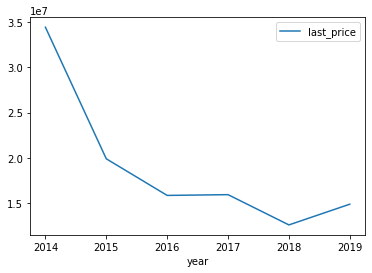

In [64]:
spb_center.pivot_table(index='year', values='last_price').plot() #делаем сводную таблицу и график

In [65]:
spb_center['year'].corr(spb_center['last_price']) #посчитаем корреляцию

-0.06583586836683011

Видно, что начиная с 2014 года стоимость падала и до 2016 года, как и в общей выборке. Но в отличии от общих данных наблюдаем самую низкую стоимость в 2018 году и подорожание к 2019 году. 

**Вывод**

Мы проанализировали центральную территорию Санкт-Петербурга и изучили площадь, цену, число комнат, высоту потолков. Также выделили факторы, которые влияют на стоимость квартиры (число комнат, этаж, дата размещения объявления).

После анализа указаных параметров выявили  взаимосвязь стоимости квартиры от числа комнат - чем больше комнат, тем дороже. На каком этаже расположена квартира: на первом этаже квартиры дешевле, а на последнем дороже. И от даты размещения: в четверг и субботу стоимость на квартиры ниже всего, а в пятницу самая высокая. Летом квартиры стоят в среднем дешевле, а также увидели, что начиная с 2014 стоимость падала и до 2016 года, и заметили минимальную стоимость на квартиру в 2018 году. 

## Общий вывод

При анализе данных из выборки были определены аномалии в данных. Были пропущеные значения в большом количестве, некоторые мы заменили на нулевые значения. Остальные данные, например расстояние до центра, аэропорта, ближайшего парка и водоёма заменить не удалось.

В ходе исследования мы обнаружили много публикаций, которые были сняты в 7, 30, 45, 60 и 90 дней, мы выявили, что дата снятия публикации - это не есть дата продажи. В связи с этим из анализа были удалены указанные объявления.
Мы нашли 10 посёлков с наибольши количеством объявлений. На первом месте Санкт-Петербург, а на последнем Выборг. По наибольшей стоимости жилья лидирует Санкт-Петербург. В Выборге, судя по нашим данным, самая низкая стоимость жилья.

Мы выявили при помощи графиков и диаграммы размаха, что нормальные значения продажи квартир варьируются от 1 до 550 дней. Также выяснили, что на стоимость квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру. Еще на стоимость влияют день, месяц, год размещения и общая площадь.
